<a href="https://colab.research.google.com/github/cagBRT/GAN/blob/main/Copy_of_Big_Sleep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(Fork of: https://colab.research.google.com/drive/1MEWKbm-driRNF8PrU7ogS5o3se-ePyPb?usp=sharing . Thank you!)

# First thing to do:
- Runtime type has to be set to GPU; but probably is already.
- Click ▶-button below to install Big Sleep in this environment. Only then can you "Start dreaming" 😀

👇


In [1]:
from IPython.display import clear_output
!pip install big-sleep --upgrade
#clear_output() #comment out if error happens and repeat
#-- OPTIONAL: Check what GPU is used--
#(expecting num_cutouts=128)
# Tesla T4    (fast: 1.70 it/S)
# Tesla P100  (OK: 1.10 it/S)
# Tesla P4    (OK: 1.55 S/it)
# Tesla K80   (very slow: 5.5 S/it)
#(To hopefully switch GPU from a K80 to a T4, first terminate the session
# then restart - you have to install Big Sleep again)
!nvidia-smi -L

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.1/143.1 kB 19.5 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=9629f3fc88f2cd1220b584182364e8c4c036b5e0f953a2992ea5a08fd2180530
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire
  Attempting uninstall: urllib3
  

In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-a5f3f0bd-9889-9310-10f4-1371fd07367d)


# Optional: Mount Google Drive in this Colab Notebook

To mount your Google Drive, do the following:

Click "5 cells hidden" and run below to mount

.............👇

In [3]:
#-- MOUNT Google Drive in Colab Notebook--
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


---
Optional: The code below creates a folder in your Google Drive **and moves all the created images in "/content/" into it.**

Colab Notebook-internal path: "/content/gdrive/MyDrive/Colab_Notebooks/Big_Sleep_images/{Folder_name}/" (Click link to open in Colab file-browser)

In [4]:
#Move all images into new folder in Google Drive
from os import path
import glob #who named that? ffs

Name_of_folder_to_create = "num_cutout tests" #@param {type:"string"}
DIR = f"/content/gdrive/MyDrive/Colab_Notebooks/Big_Sleep_images/{Name_of_folder_to_create}/"

if path.isdir(DIR):
  print("==== Folder already exists ====")
  if glob.glob("/content/*.png"): #ffs
    print("==== Moving files... :) ====")
    !mv ./*.png "{DIR}"
  else:
    print("==== No images to move ====")
else:
  print("==== Folder does not exist ====")
  !mkdir "{DIR}"
  if path.isdir(DIR):
    print("==== New folder created ====")
    if glob.glob("/content/*.png"): #ffs
      print("==== Moving files... :) ====")
      !mv ./*.png "{DIR}"
    else:
      print("==== No images to move ====")
  else:
    print("==== Folder could not be created! ====")


==== Folder does not exist ====
mkdir: cannot create directory ‘/content/gdrive/MyDrive/Colab_Notebooks/Big_Sleep_images/num_cutout tests/’: No such file or directory
==== Folder could not be created! ====


---
Warning: The following code deletes all images in output folder, "/content/". (Does NOT touch Google Drive folders!)

In [5]:
#-- WARNING: Run to delete all images in output folder (./content/*.png) - Does NOT touch gdrive folders--
!rm ./*.png

rm: cannot remove './*.png': No such file or directory


# How to use:

- "**Description**" tells the GAN what to dream about. (The description of the images contents.) Can even be non-descriptive sentences like: "*the tragic intimacy of the eternal conversation with oneself*"

- Start after entering the desired description, press the ▶-button and wait until a picture appears. To get a better result, wait longer. The picture will update over time.

- To save the picture you can either simple right-click and "save-as" *("open in new tab" then "save-as" on mobile device)* or you can click the 📁-button on the left side of the screen. (If mounted, the Google Drive is also found there - under "gdrive")

- To stop dreaming you might have to press the ◼-button three times and agree to restart the environment. *If display errors in the output down below arise, stop execution of code via 'Runtime, Restart runtime' instead of the stop button*.

- You can train the GAN on multiple phrases using the symbol "|" in the "**Description**". For example: "*an armchair in the form of pikachu|an armchair imitating pikachu|abstract"*
  (Also works in "**Avoid_this**")

- "**Avoid_this**" can be words or phrases that wont be part of the image. I.E.: "*blur*" should result in sharper images, "*green*" avoids the color green, etc..

- "**Seed**" number changes image on which the dream is based on. You might get better results with a different value. (You can - more or less - see the seed-image if you enter the same word in "**Description**" and "**Avoid_this**", and save the image after one iteration)

- Make sure to uncheck "**Move_images_directly_into_gdrive_folder**" if you don't want to do that as it speeds the execution up a bit. (As does unchecking anything else you don't want to happen)

- For most *accurate?* results keep "**Learning_rate**" around 0.03 (smaller number = more *accuracy*, but needs more Iterations to converge on description??) and "**Max_classes**" around 15 (bigger number = more *creativity*?) and "**num_cutouts = 128**"

- **Performance:** Changing "**num_cutouts**" to **64** or less, (Default 128. 48 is a good middle.), increases performance drastically. On the other hand, a high number in "**Max_classes**" reduces speed.

- You need to restart the runtime after every change to the source code in /usr/local/lib/python3.7/dist-packages/ (Click to open path in colab file-explorer)

- Images are saved in /content/ and then, if desired, moved to GDrive folder

- *(See code for more explanations and some results of seed values)*

---


Check all settings, run the code below and start dreaming :)

# Start dreaming ...


Current seed is: 95528492


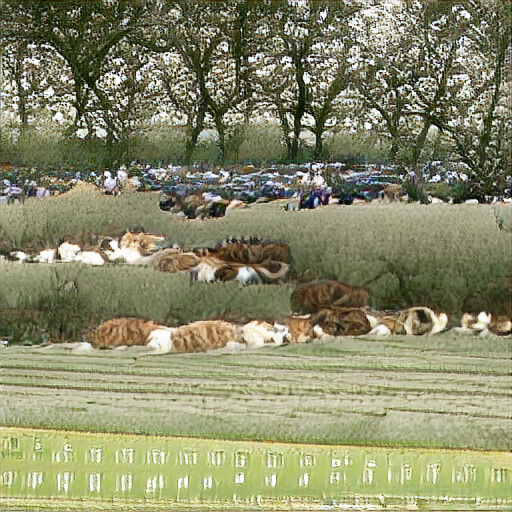


iteration:   6%|▌         | 5932/100001 [37:56<10:19:04,  2.53it/s]


In [ ]:
#Bad ideas
# a depressed entity laments its sad existence
# a living entity disregards reality to succeed at its goals
# a sleeping cat dreams a beautiful dream
# the dichotomy of depression and happiness
# the eternal battle between depression and happiness
# a realistic cat
# a very determined entity climbing a ladder sideways
# corporate slaves in a dystopian future
# the corporate duopoly rules over common people
# a anarchist is rebelling against the establishment
# mushrooms growing on top of a guys head
# magma anything
# the face of a mine
# fractal stuff
# M. C. Escher painting
# a landscape made of cats


#Seed values and styles
# 1111111 = A bus or
# 528 = white or brown dog
# 519 = beehive in tree?
# 5092785 = dark maybe, maybe not?
# 8676313 = dark, black, technological
# 465432210 = dark, blue thing
# 5092387857 = indoor scene with people
# 50923887857 = flowers, plants, (colorful)
# 50921568718573 = buildings in green scenery, clouds, or blue thing on concrete
# 11488240546753448532 = door
# 12 = picture of a women
# 11 = people holding things??
# 10 = leaves, insects, garden?
# 9 = dogs, orange oval?
# 8 = text, canvas?
# 7 = pets in cages?, dragonfly
# 6 = indoors human interaction
# 5 =
# 4 = black and white, people
# 3 = street pictures?
# 2 = family pictures
# 1 = backyards, parks?
# 0 = oval horse-thing, dunes, sattelite images??

from tqdm import trange
from IPython.display import Image, display, clear_output
from big_sleep import Imagine
import random as rnd


Description = "a large number of cats rest in a field" #@param {type:"string"}
Avoid_this = "" #@param {type:"string"}
#avoids results that fit these words or this description
Save_every_nth_image =  25#@param {type:"integer"}
Save_progress_as_new_image_every_nth = False #@param {type:"boolean"}
Save_extra_image_that_best_fits_Description = False #@param {type:"boolean"}
Number_of_iterations =  100000#@param {type:"integer"}
Number_of_epochs = 1 #XXX@param {type:"number"}
#remove XXX if you want more epochs. Useless: Just use more iterations
Learning_rate = 0.07 #@param {type:"number"}
#Default is 0.07 (0.03 is good for accuracy)
Max_classes =  25#@param {type:"integer"}
#from 0 to 1000. Default is 15? Higher numbers produce more creative results. (Creative overflow when over 900 ... no convergence)
Num_cutouts = 64 #@param {type:"integer"}
Seed =  8194450#@param {type:"integer"}
#Maximum = 18446744073709551615
Random_Seed = True #@param {type:"boolean"}
Append_Seed_to_filename = True #@param {type:"boolean"}
Display_images_in_output = True #@param {type:"boolean"}
Clear_output_before_displaying_image = True #@param {type:"boolean"}
Move_images_directly_into_gdrive_folder = False #@param {type:"boolean"}
#MAKE SURE to mount gdrive first
Use_Description_as_folder_name = False #@param {type:"boolean"}
Otherwise_use_this_folder_name = "random stuff" #@param {type:"string"}

#-----Experimental stuff:
#bilinear = False #not working
#experimental_resample = False #not working
# only if no seed value and random = true????
Center_bias = False #@param {type:"boolean"}
Torch_deterministic = False #@param {type:"boolean"}
Class_temperature = 2. #@param {type:"number"} #def "2."; Maybe weight of classes found in Description?
Ema_decay =  0.5#@param {type:"number"} #def "0.5"; Exponential Moving Average, Fuck if I know... Weird GANNN stuff
#image_size = 512 # can't be higher, only lower: 128, 256, 512
#gradient_accumulate_every = 1 #only 1 makes sense. above exponentially increases
#time needed to finish iteration. Also seems to have negative effect on accuracy
# vs description

#Fix input errors:
name = Description.replace("-", "_").replace(",", "").replace(" ", "_").replace("|", "--").strip('-_')[:255]
Otherwise_use_this_folder_name = Otherwise_use_this_folder_name.replace("-", "_").replace(",", "").replace(" ", "_").replace("|", "--").strip('-_')[:255]
penalize = Avoid_this.replace("-", "_").replace(",", "").replace(" ", "_").replace("|", "--").strip('-_')[:255]

Number_of_iterations = Number_of_iterations + 1 #Eh... whatever. Fixes images not showing in output if Save_every_nth_image == Iterations
# or if last image falls on multiple of Save_every_nth_image


if Use_Description_as_folder_name:
  DIR = f"/content/gdrive/MyDrive/Colab_Notebooks/Big_Sleep_images/{name}/"
else:
  DIR = f"/content/gdrive/MyDrive/Colab_Notebooks/Big_Sleep_images/{Otherwise_use_this_folder_name}/"

if Move_images_directly_into_gdrive_folder:
  !mkdir "{DIR}" #moving done in last line; in "for i" loop... expensive...

if Random_Seed:
  Seed = rnd.randint(0, 1000000000)  #max: 18446744073709551615

if Append_Seed_to_filename:
  if penalize and not penalize == "_": #check if Avoid_this actually contains something. Could just be an accidental space that has been replaced with "_"
    path = f'./{name}_wout_{penalize}.{Seed}.png'
  else:
    path = f'./{name}.{Seed}.png'
else:
  if penalize and not penalize == "_": #check if Avoid_this actually contains something. Could just be an accidental space that has been replaced with "_"
    path = f'./{name}_wout_{penalize}.png'
  else:
    path = f'./{name}.png'

model = Imagine(
  #bilinear = bilinear,
  #experimental_resample = experimental_resample,
  #gradient_accumulate_every = gradient_accumulate_every,
  #image_size = image_size,
  torch_deterministic = Torch_deterministic,
  ema_decay = Ema_decay,
  class_temperature = Class_temperature,
  center_bias = Center_bias,
  text = Description,
  text_min = Avoid_this,
  save_every = Save_every_nth_image,
  save_progress = Save_progress_as_new_image_every_nth,
  lr = Learning_rate,
  iterations = Number_of_iterations,
  epochs = Number_of_epochs,
  max_classes = Max_classes,
  num_cutouts = Num_cutouts,
  save_best = Save_extra_image_that_best_fits_Description,
  seed = Seed,
  append_seed = Append_Seed_to_filename
)


for epoch in trange(Number_of_epochs, desc = 'epochs'):
  for i in trange(Number_of_iterations, desc = 'iteration'):
    model.train_step(epoch, i)

    if i == 0 or i % model.save_every != 0:  #basically: if i not multiple of save_every, skip next steps
      continue
    if Display_images_in_output: #if variable == true:
      if Clear_output_before_displaying_image:
        clear_output()
      print("\nCurrent seed is: %i" % Seed)
      display(Image(path))
    else:
      print("\nCurrent seed is: %i" % Seed)

    if Move_images_directly_into_gdrive_folder:
      !mv ./*.png "{DIR}" #keep here to be able to display images first in output
if Move_images_directly_into_gdrive_folder:
  !mv ./*.png "{DIR}" #last image too
